# INM433 - VA Computational Notebook


***

** Student Name: ** Lesley Dwyer

** Project Title:** Geographical Analysis of US Obesity

***



# Import Libraries and Data

In [1]:
# Magic function needed to see matplotlib plots inline in Jupyter
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns;

# Set max rows and columns to display in Jupyter
pd.set_option('max_rows', 50);
pd.set_option('max_columns', 50);

In [2]:
# Load the csv and Excel files into dataframes
county_health1_df = pd.read_excel('2018CountyHealthRankingsData-v1.xls', 'Ranked Measure Data', skiprows=1); # county health
county_health2_df = pd.read_excel('2018CountyHealthRankingsData-v1.xls', 'Additional Measure Data', skiprows=1); # county health

# Data Processing

In [3]:
county_health1_df.rename(columns={'% Obese':'Perc_Obese'}, inplace=True)
county_health1_df.Perc_Obese.describe()

count    3142.000000
mean       31.473679
std         4.514139
min        12.800000
25%        28.800000
50%        31.800000
75%        34.400000
max        47.800000
Name: Perc_Obese, dtype: float64

In [4]:
high_outlier = county_health1_df.Perc_Obese.mean() + 3*(county_health1_df.Perc_Obese.std())
low_outlier = county_health1_df.Perc_Obese.mean() - 3*(county_health1_df.Perc_Obese.std())
print(high_outlier)
print(low_outlier)

45.01609618059452
17.931262189870274


In [5]:
# See high outliers
county_health1_df[county_health1_df.Perc_Obese >= high_outlier].sort_values('Perc_Obese')

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,Years of Potential Life Lost Rate (Black),Years of Potential Life Lost Rate (Hispanic),Years of Potential Life Lost Rate (White),% Fair/Poor,95% CI - Low.1,95% CI - High.1,Quartile.1,Physically Unhealthy Days,95% CI - Low.2,95% CI - High.2,Quartile.2,Mentally Unhealthy Days,95% CI - Low.3,95% CI - High.3,Quartile.3,Unreliable,% LBW,95% CI - Low.4,...,Injury Death Rate,95% CI - Low.18,95% CI - High.18,Quartile.29,Average Daily PM2.5,Quartile.30,Presence of violation,Quartile.31,# Households with Severe Problems,% Severe Housing Problems,95% CI - Low.19,95% CI - High.19,Quartile.32,% Drive Alone,95% CI - Low.20,95% CI - High.20,Quartile.33,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
3086,55078,Wisconsin,Menominee,14984.049589,11968.726615,18528.009362,4,NaN,NaN,NaN,32.474310,31.273341,33.621171,4,6.330704,6.062051,6.593751,4,5.794465,5.529164,6.058218,4,NaN,7.331378,5.4,...,134.619699,90.8,192.2,4,8.3,1,No,1,230,18.548387,13.111899,23.984875,4,75.034388,68.009728,82.059048,1,NaN,NaN,NaN,1091,11.2,6.232761,16.167239,1
2940,51730,Virginia,Petersburg City,14028.062776,12611.162292,15444.963259,4,14377.871934,NaN,13208.016563,25.959719,25.102514,26.854145,4,4.449487,4.272921,4.631266,4,4.004597,3.826296,4.181095,4,NaN,12.542017,11.6,...,107.073670,91.1,123.0,4,8.9,3,NaN,2,2585,20.655214,18.094604,23.215823,4,78.325617,75.161732,81.489503,2,76.950763,75.0,88.416332,10151,28.3,23.800648,32.799352,2
42,1085,Alabama,Lowndes,14443.619257,11714.557675,17172.680839,4,16411.768391,NaN,10414.285170,30.048412,29.042946,31.020276,4,5.359850,5.149062,5.567300,4,5.121477,4.911288,5.336575,4,NaN,14.672216,12.4,...,115.189969,88.1,148.0,4,10.0,2,No,1,985,22.987165,18.515646,27.458683,4,83.775811,77.369833,90.181790,1,72.561983,NaN,83.905790,2840,58.7,49.001247,68.398753,4
1411,28021,Mississippi,Claiborne,13624.574108,10614.245339,16634.902878,4,13969.916282,NaN,6594.953449,34.959494,33.773759,36.136181,4,5.372499,5.124672,5.634042,4,4.796865,4.566592,5.049570,4,NaN,15.976331,13.5,...,97.887799,71.4,131.0,3,8.6,1,No,1,760,24.012638,18.196888,29.828389,4,84.931507,79.150040,90.712974,3,87.917738,NaN,82.360097,1984,30.9,20.926302,40.873698,2
1432,28063,Mississippi,Jefferson,13132.391283,10176.040847,16088.741718,4,13938.667891,NaN,8651.541565,34.565212,33.356268,35.753826,4,5.124957,4.882899,5.371306,4,4.742442,4.511833,4.986753,4,NaN,16.513761,13.9,...,92.912132,64.7,129.2,3,8.4,1,No,1,385,15.068493,9.108002,21.028985,2,90.514229,84.472303,96.556154,4,NaN,NaN,NaN,1813,39.5,22.247662,56.752338,3
43,1087,Alabama,Macon,13908.729130,11695.238301,16122.219959,4,14909.946169,NaN,9593.025941,29.978206,28.935829,30.988529,4,5.169402,4.943440,5.395064,4,4.851559,4.631353,5.075219,3,NaN,13.385827,11.6,...,84.940030,67.7,105.3,3,10.6,3,No,1,1685,20.957711,17.945390,23.970033,4,78.020339,73.669772,82.370906,1,79.489735,NaN,83.608361,5754,36.5,31.276437,41.723563,2


In [6]:
# See low outliers
county_health1_df[county_health1_df.Perc_Obese <= low_outlier].sort_values('Perc_Obese')

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,Years of Potential Life Lost Rate (Black),Years of Potential Life Lost Rate (Hispanic),Years of Potential Life Lost Rate (White),% Fair/Poor,95% CI - Low.1,95% CI - High.1,Quartile.1,Physically Unhealthy Days,95% CI - Low.2,95% CI - High.2,Quartile.2,Mentally Unhealthy Days,95% CI - Low.3,95% CI - High.3,Quartile.3,Unreliable,% LBW,95% CI - Low.4,...,Injury Death Rate,95% CI - Low.18,95% CI - High.18,Quartile.29,Average Daily PM2.5,Quartile.30,Presence of violation,Quartile.31,# Households with Severe Problems,% Severe Housing Problems,95% CI - Low.19,95% CI - High.19,Quartile.32,% Drive Alone,95% CI - Low.20,95% CI - High.20,Quartile.33,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
263,8037,Colorado,Eagle,4328.164441,3617.022305,5039.306576,1,NaN,3360.992630,4698.166467,10.586307,10.229355,10.976105,2,2.888850,2.755435,3.014501,1,3.061199,2.920326,3.202601,1,NaN,9.251671,8.4,...,47.574278,39.3,55.9,1,4.9,1,No,1,3475,19.262749,16.238971,22.286528,4,71.692279,69.013818,74.370740,2,NaN,72.631721,73.019138,22953,24.9,21.002536,28.797464,2
3138,56039,Wyoming,Teton,3823.238218,2806.927407,4839.549029,1,NaN,NaN,NaN,12.181700,11.714214,12.629813,1,3.166316,3.022339,3.324127,1,3.072253,2.913946,3.234675,1,NaN,7.557812,6.3,...,58.309553,45.1,74.2,1,6.3,1,Yes,3,1445,18.349206,14.089962,22.608451,4,64.134780,59.697670,68.571890,1,NaN,57.172131,65.065532,8984,11.5,7.798704,15.201296,1
1821,35049,New Mexico,Santa Fe,6991.921608,6454.242403,7529.600813,1,NaN,7663.573933,6610.384565,14.636130,14.233160,15.064501,1,3.884093,3.761950,4.004974,1,3.767271,3.640578,3.900752,1,NaN,10.071178,9.5,...,97.254291,90.1,104.4,2,6.5,3,Yes,2,12730,20.761641,19.532365,21.990916,4,76.383542,74.943151,77.823934,2,82.952816,79.356132,70.112096,52186,26.6,24.852934,28.347066,3
298,8107,Colorado,Routt,4865.081772,3700.636416,6029.527127,1,NaN,NaN,NaN,9.837300,9.418924,10.297235,1,2.890598,2.746107,3.048072,1,3.352351,3.186064,3.531172,2,NaN,9.114583,7.7,...,66.951209,53.1,83.3,1,5.3,2,No,1,2005,20.939948,17.186043,24.693852,4,68.511712,64.166805,72.856619,1,NaN,61.257036,68.367649,9506,19.2,16.045365,22.354635,2
250,8013,Colorado,Boulder,4214.792148,3949.993105,4479.591191,1,6794.857319,4549.052213,4237.547757,9.449221,9.168447,9.715426,1,2.936034,2.820701,3.053007,1,3.060634,2.937570,3.193677,1,NaN,7.905061,7.5,...,67.057378,63.0,71.1,1,8.0,4,Yes,2,24460,20.127546,19.103801,21.151291,4,65.226754,64.161570,66.291938,1,62.701706,71.874493,70.170690,107525,26.7,25.496655,27.903345,3
2798,49043,Utah,Summit,4964.079909,4095.702893,5832.456925,1,NaN,NaN,NaN,9.441092,9.060933,9.817027,1,2.884483,2.753700,3.021665,1,3.035469,2.892064,3.187731,1,NaN,8.714239,7.7,...,60.858981,49.9,71.8,1,7.5,4,Yes,2,1940,14.450652,12.005641,16.895662,3,74.954199,72.613659,77.294739,2,NaN,72.186540,73.270534,15547,38.7,35.469767,41.930233,4
303,8117,Colorado,Summit,3992.932997,3116.100526,4869.765468,1,NaN,NaN,NaN,10.286641,9.859457,10.748694,1,2.996856,2.848560,3.158821,2,3.095949,2.934384,3.272736,1,NaN,11.520970,10.1,...,51.114988,40.2,64.1,1,4.7,1,No,1,2550,24.554646,20.402528,28.706764,4,70.434587,65.758735,75.110439,2,NaN,73.647253,71.257665,12512,12.8,9.009640,16.590360,1
270,8051,Colorado,Gunnison,4522.502519,3231.107660,5813.897377,1,NaN,NaN,NaN,11.879663,11.387304,12.389278,2,3.402831,3.236425,3.583801,3,3.624280,3.440351,3.826710,3,NaN,10.086455,8.3,...,82.089364,63.4,104.6,2,4.6,1,Yes,2,1215,19.179163,15.495072,22.863255,4,57.734621,52.370454,63.098787,1,NaN,60.563380,57.204198,5143,21.7,16.159895,27.240105,2
293,8097,Colorado,Pitkin,4602.995039,3009.627382,6196.362696,1,NaN,NaN,NaN,9.596961,9.202816,10.002283,1,2.961223,2.803007,3.115135,2,3.142089,2.966936,3.311502,1,NaN,9.656652,7.8,...,48.971039,35.4,66.0,1,4.6,1,Yes,2,1335,18.150918,14.105869,22.195967,3,50.6499

In [7]:
# Select only columns needed based on initial analysis
county_health1_df = county_health1_df.iloc[:, [0,1,2,34,38,40,44,46,103,107,115,124,143]];

# Select only columns needed based on initial analysis
county_health2_df = county_health2_df.iloc[:, [0,36,38,61,81,83,85,87,89,91,96]];

# Check FIPS column is unique in both dataframes and can be used for joining
county_health2_df.FIPS.duplicated().sum()
county_health1_df.FIPS.duplicated().sum()

0

In [8]:
# Merge the two (reduced) County health datasets together using FIPS
county_health = pd.merge(county_health1_df, county_health2_df, on="FIPS")
county_health.head()

,FIPS,State,County,Perc_Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Graduation Rate,% Some College,% Children in Poverty,Income Ratio,Average Daily PM2.5,% Food Insecure,% Limited Access,Household Income,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Female
0,1001,Alabama,Autauga,36.4,7.1,30.9,71.120192,16.878015,90.000000,61.942019,19.3,4.388346,10.8,13.9,11.991125,54487.0,19.048650,0.485419,1.140465,0.101054,2.688754,75.000000,51.288437
1,1003,Alabama,Baldwin,29.3,7.9,24.5,68.518915,16.714969,85.000000,63.757100,17.6,4.600735,9.6,13.0,5.424427,56460.0,9.042831,0.770990,1.074975,0.059454,4.416411,83.202198,51.457833
2,1005,Alabama,Barbour,44.2,5.5,30.6,52.842627,12.698715,86.173469,39.723661,39.6,5.861660,10.1,23.4,10.739667,32884.0,47.513961,0.631619,0.450607,0.173310,4.213364,46.450992,46.932409
3,1007,Alabama,Bibb,38.4,7.6,37.5,48.592625,15.925151,85.000000,49.821371,27.5,4.228127,10.5,16.1,2.601627,43079.0,21.618160,0.379808,0.198737,0.119242,2.499669,74.415934,46.363114
4,1009,Alabama,Blount,35.8,8.5,29.0,32.272077,15.378722,91.206250,53.866457,19.4,4.068237,11.3,11.3,2.880150,47213.0,1.434909,0.627340,0.265146,0.112644,9.068695,87.467073,50.613476


In [9]:
county_health.describe()

,FIPS,Perc_Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Graduation Rate,% Some College,% Children in Poverty,Income Ratio,Average Daily PM2.5,% Food Insecure,% Limited Access,Household Income,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Female
count,3142.000000,3142.000000,3123.000000,3142.000000,3136.000000,3142.000000,2672.000000,3142.000000,3141.000000,3140.000000,3108.000000,3142.000000,3123.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,31.473679,7.408421,26.821642,62.991456,17.411379,86.194963,57.230574,22.372302,4.522027,8.951770,14.138638,8.651256,49522.113976,8.942638,2.309355,1.485634,0.134995,9.289609,76.584298,49.898769
std,15162.508374,4.514139,1.186207,5.176125,23.190070,3.242948,8.222771,11.550330,9.209209,0.735497,1.583301,4.236025,8.368703,12887.309622,14.311175,7.720646,2.859285,0.984956,13.661742,20.087446,2.273583
min,1001.000000,12.800000,0.000000,9.800000,0.000000,9.265156,30.136986,15.510340,2.900000,2.682163,4.200000,3.400000,0.000000,22045.000000,0.000000,0.000000,0.000000,0.000000,0.501749,2.811823,27.801194
25%,18177.500000,28.800000,6.900000,23.600000,49.114488,15.083152,82.364233,49.238949,15.600000,4.006975,7.900000,11.400000,3.625438,41072.000000,0.666228,0.360862,0.437853,0.028240,2.207112,64.903854,49.458533
50%,29176.000000,31.800000,7.600000,26.800000,66.286614,17.376413,87.500000,57.064722,21.300000,4.420610,9.200000,13.600000,6.508531,47589.000000,2.173413,0.610483,0.695897,0.057314,4.099499,83.989306,50.331131
75%,45080.500000,34.400000,8.200000,30.200000,80.349689,19.666507,92.262557,65.513936,27.900000,4.876680,10.000000,16.300000,10.679796,55308.000000,10.081753,1.305247,1.352192,0.112143,9.426238,92.711531,51.018209
max,56045.000000,47.800000,10.000000,44.400000,100.000000,29.440119,100.000000,94.047619,66.300000,8.928957,15.400000,37.900000,71.844209,134609.000000,85.151548,93.067462,44.265777,50.000000,96.254016,97.977244,56.546085


In [10]:
# Check skewness
county_health.skew()

FIPS                                        -0.079662
Perc_Obese                                  -0.370628
Food Environment Index                      -1.483152
% Physically Inactive                       -0.058862
% With Access                               -0.659224
% Excessive Drinking                         0.187754
Graduation Rate                             -1.565603
% Some College                              -0.073135
% Children in Poverty                        0.700306
Income Ratio                                 1.177647
Average Daily PM2.5                         -0.386626
% Food Insecure                              0.921559
% Limited Access                             2.648695
Household Income                             1.390617
% African American                           2.299562
% American Indian/Alaskan Native             7.624449
% Asian                                      7.281615
% Native Hawaiian/Other Pacific Islander    43.041059
% Hispanic                  

In [11]:
# Check for missing values
county_health.isna().sum() 

FIPS                                          0
State                                         0
County                                        0
Perc_Obese                                    0
Food Environment Index                       19
% Physically Inactive                         0
% With Access                                 6
% Excessive Drinking                          0
Graduation Rate                             470
% Some College                                0
% Children in Poverty                         1
Income Ratio                                  2
Average Daily PM2.5                          34
% Food Insecure                               0
% Limited Access                             19
Household Income                              1
% African American                            0
% American Indian/Alaskan Native              0
% Asian                                       0
% Native Hawaiian/Other Pacific Islander      0
% Hispanic                              

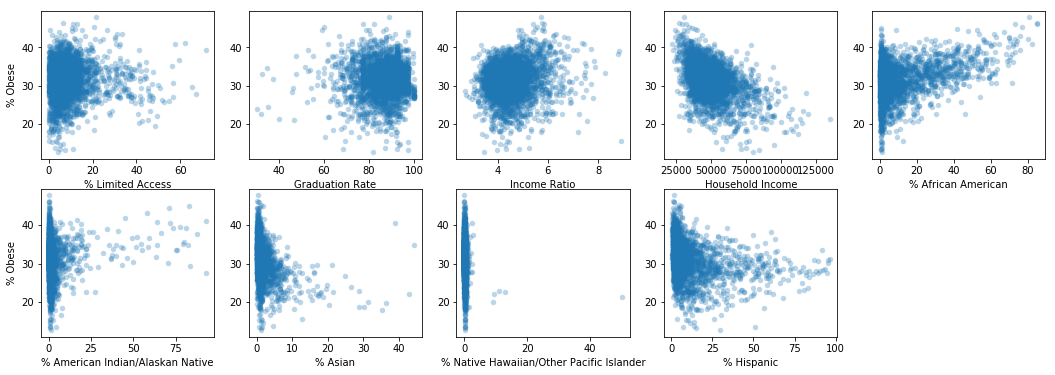

In [12]:
# Scatter plot to see some outliers and relationship with % Obese
plt.rcParams['figure.figsize'] = (18,6);
plt.subplot(2, 5, 1)
plt.xlabel('% Limited Access')
plt.ylabel('% Obese')
plt.scatter(county_health['% Limited Access'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(2, 5, 2)
plt.xlabel('Graduation Rate')
plt.scatter(county_health['Graduation Rate'], county_health.Perc_Obese,s=30, alpha=0.3, 
            linewidth='0');

plt.subplot(2, 5, 3)
plt.xlabel('Income Ratio')
plt.scatter(county_health['Income Ratio'], county_health.Perc_Obese,s=30, alpha=0.3, 
            linewidth='0');

plt.subplot(2, 5, 4)
plt.xlabel('Household Income')
plt.scatter(county_health['Household Income'], county_health.Perc_Obese,s=30, alpha=0.3, 
            linewidth='0');

plt.subplot(2, 5, 5)
plt.xlabel('% African American')
plt.scatter(county_health['% African American'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(2, 5, 6)
plt.xlabel('% American Indian/Alaskan Native')
plt.ylabel('% Obese')
plt.scatter(county_health['% American Indian/Alaskan Native'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(2, 5, 7)
plt.xlabel('% Asian')
plt.scatter(county_health['% Asian'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(2, 5, 8)
plt.xlabel('% Native Hawaiian/Other Pacific Islander')
plt.scatter(county_health['% Native Hawaiian/Other Pacific Islander'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(2, 5, 9)
plt.xlabel('% Hispanic')
plt.scatter(county_health['% Hispanic'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.show()

In [13]:
# Impute missing values with the median which is robust to outliers
county_health.fillna(county_health.median(), inplace=True)

In [14]:
# Confirm missing values are all gone
county_health.isna().sum() 

FIPS                                        0
State                                       0
County                                      0
Perc_Obese                                  0
Food Environment Index                      0
% Physically Inactive                       0
% With Access                               0
% Excessive Drinking                        0
Graduation Rate                             0
% Some College                              0
% Children in Poverty                       0
Income Ratio                                0
Average Daily PM2.5                         0
% Food Insecure                             0
% Limited Access                            0
Household Income                            0
% African American                          0
% American Indian/Alaskan Native            0
% Asian                                     0
% Native Hawaiian/Other Pacific Islander    0
% Hispanic                                  0
% Non-Hispanic White              

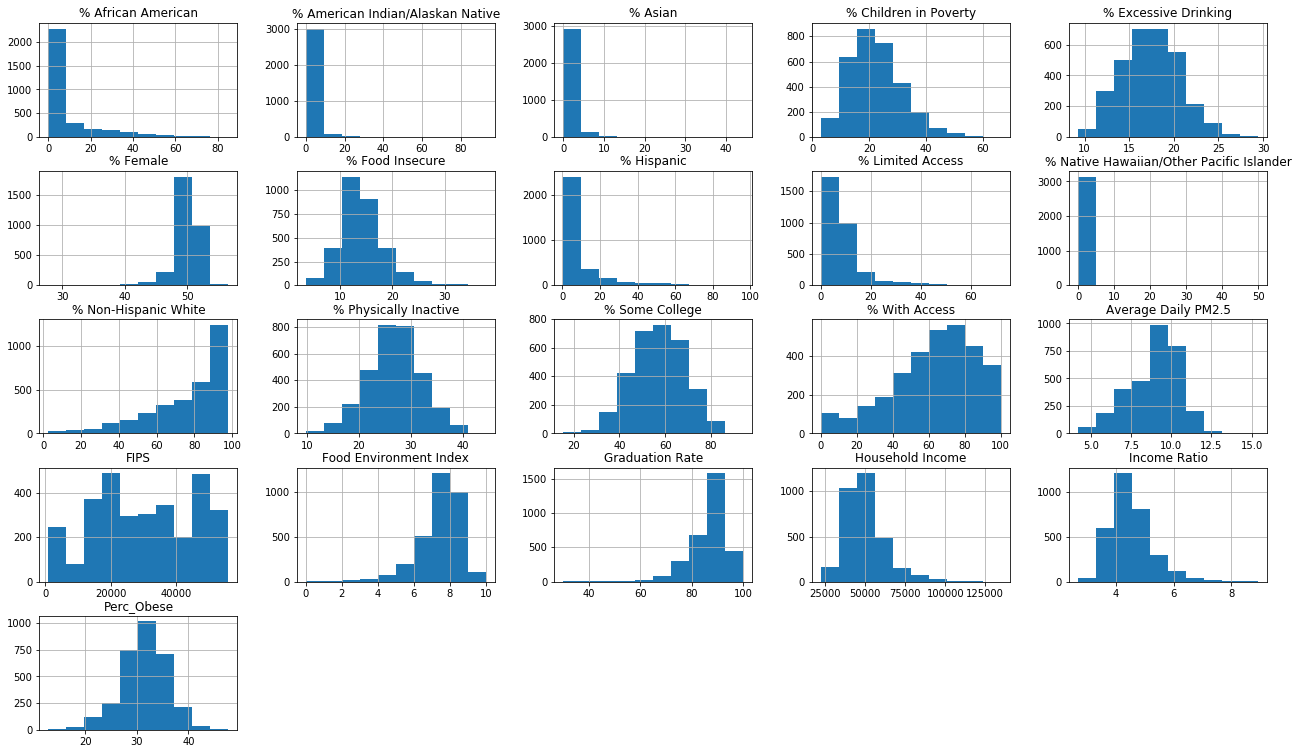

In [15]:
# Check distributions - a lot of columns are not normally distributed, so it is best to transform them
plt.rcParams['figure.figsize'] = (22,13)
county_health.hist()
plt.show()

In [16]:
# Several columns have high skew so require transformation
# Applying log function to normalise columns cannot be used for 0 values (as they will change to infinity)
# Also log transformation to negatively skewed columns will make them worse
# Check which columns have zeroes first
county_health[county_health == 0].count()

FIPS                                          0
State                                         0
County                                        0
Perc_Obese                                    0
Food Environment Index                        1
% Physically Inactive                         0
% With Access                                15
% Excessive Drinking                          0
Graduation Rate                               0
% Some College                                0
% Children in Poverty                         0
Income Ratio                                  0
Average Daily PM2.5                           0
% Food Insecure                               0
% Limited Access                             10
Household Income                              0
% African American                           11
% American Indian/Alaskan Native              2
% Asian                                      11
% Native Hawaiian/Other Pacific Islander    238
% Hispanic                              

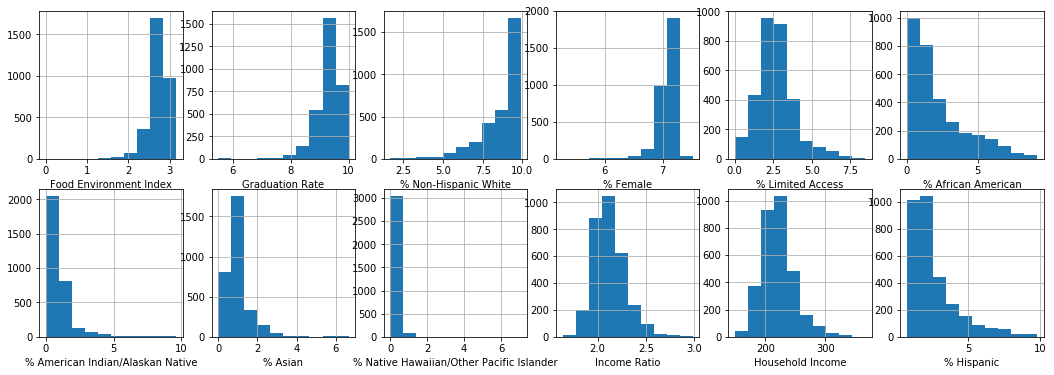

In [17]:
# Try Square Root transformation - some look worse

plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(2, 6, 1)
sqrt_FEI = np.sqrt(county_health['Food Environment Index']) # looks worse - leave as is (log won't work)
plt.xlabel('Food Environment Index')
sqrt_FEI.hist()

sqrt_grad = np.sqrt(county_health['Graduation Rate']) # looks worse - leave as is (log won't work)
plt.subplot(2, 6, 2)
plt.xlabel('Graduation Rate')
sqrt_grad.hist()

plt.subplot(2, 6, 3)
sqrt_white = np.sqrt(county_health['% Non-Hispanic White']) # try inverse (log won't work)
plt.xlabel('% Non-Hispanic White')
sqrt_white.hist()

plt.subplot(2, 6, 4)
sqrt_female = np.sqrt(county_health['% Female']) # looks better
plt.xlabel('% Female')
sqrt_female.hist()

plt.subplot(2, 6, 5)
sqrt_LA = np.sqrt(county_health['% Limited Access']) # looks better
plt.xlabel('% Limited Access')
sqrt_LA.hist()

sqrt_AA = np.sqrt(county_health['% African American']) # try shifting to min of 1
plt.subplot(2, 6, 6)
plt.xlabel('% African American')
sqrt_AA.hist()

plt.subplot(2, 6, 7)
sqrt_AIAN = np.sqrt(county_health['% American Indian/Alaskan Native'])  # try shifting to min of 1
plt.xlabel('% American Indian/Alaskan Native')
sqrt_AIAN.hist()

plt.subplot(2, 6, 8)
sqrt_asian = np.sqrt(county_health['% Asian']) # looks slightly better
plt.xlabel('% Asian')
sqrt_asian.hist()
                                       
plt.subplot(2, 6, 9)
sqrt_NHOPI = np.sqrt(county_health['% Native Hawaiian/Other Pacific Islander'])  # try shifting to min of 1
plt.xlabel('% Native Hawaiian/Other Pacific Islander')
sqrt_NHOPI.hist()
                       
plt.subplot(2, 6, 10)
sqrt_IR = np.sqrt(county_health['Income Ratio']) # looks better
plt.xlabel('Income Ratio')
sqrt_IR.hist()

plt.subplot(2, 6, 11)
sqrt_HI = np.sqrt(county_health['Household Income']) # looks better
plt.xlabel('Household Income')
sqrt_HI.hist()
                                       
plt.subplot(2, 6, 12)
sqrt_hisp = np.sqrt(county_health['% Hispanic']) # not great - try log
plt.xlabel('% Hispanic')
sqrt_hisp.hist()
plt.show() 

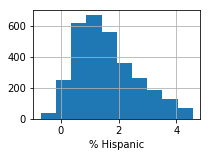

In [18]:
# Try log for % Hispanic
plt.rcParams['figure.figsize'] = (3,2)
plt.subplot(1, 1, 1)
log_hisp = np.log(county_health['% Hispanic']) 
plt.xlabel('% Hispanic')
log_hisp.hist()
plt.show() 

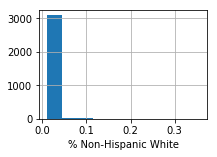

In [19]:
# Try inverse 
plt.rcParams['figure.figsize'] = (3,2)
plt.subplot(1, 1, 1)
inv_white = 1/(county_health['% Non-Hispanic White'])  # looks worse - leave as is
plt.xlabel('% Non-Hispanic White')
inv_white.hist() ;

In [20]:
# Shift values so minimum value is 1, then use log transformation

log_AA = county_health['% African American'] + 1
log_AIAN = county_health['% American Indian/Alaskan Native'] + 1
log_NHOPI = county_health['% Native Hawaiian/Other Pacific Islander'] + 1

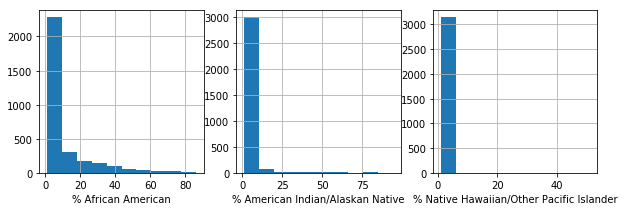

In [21]:
plt.rcParams['figure.figsize'] = (10,3)
plt.subplot(1, 3, 1)
plt.xlabel('% African American')
log_AA.hist()

plt.subplot(1, 3, 2)
plt.xlabel('% American Indian/Alaskan Native')
log_AIAN.hist()
                                       
plt.subplot(1, 3, 3)
plt.xlabel('% Native Hawaiian/Other Pacific Islander')
log_NHOPI.hist()
plt.show()
# no improvement

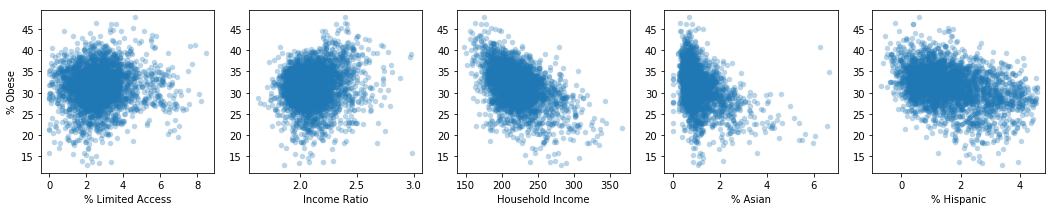

In [22]:
# Scatter plots to see some transformed data - outliers are reduced
plt.rcParams['figure.figsize'] = (18,3);
plt.subplot(1, 5, 1)
plt.xlabel('% Limited Access')
plt.ylabel('% Obese')
plt.scatter(sqrt_LA, county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(1, 5, 2)
plt.xlabel('Income Ratio')
plt.scatter(sqrt_IR, county_health.Perc_Obese,s=30, alpha=0.3, 
            linewidth='0');

plt.subplot(1, 5, 3)
plt.xlabel('Household Income')
plt.scatter(sqrt_HI, county_health.Perc_Obese,s=30, alpha=0.3, 
            linewidth='0');

plt.subplot(1, 5, 4)
plt.xlabel('% Asian')
plt.scatter(sqrt_asian, county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');

plt.subplot(1, 5, 5)
plt.xlabel('% Hispanic')
plt.scatter(log_hisp, county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.show()

In [23]:
# Update dataframe with transformed columns
county_health['% Female'] = np.sqrt(county_health['% Female'])
county_health['% Limited Access'] = np.sqrt(county_health['% Limited Access'])
county_health['Income Ratio'] = np.sqrt(county_health['Income Ratio'])
county_health['Household Income'] = np.sqrt(county_health['Household Income'])
county_health['% Hispanic'] = np.log(county_health['% Hispanic'])
county_health['% Asian'] = np.sqrt(county_health['% Asian'])

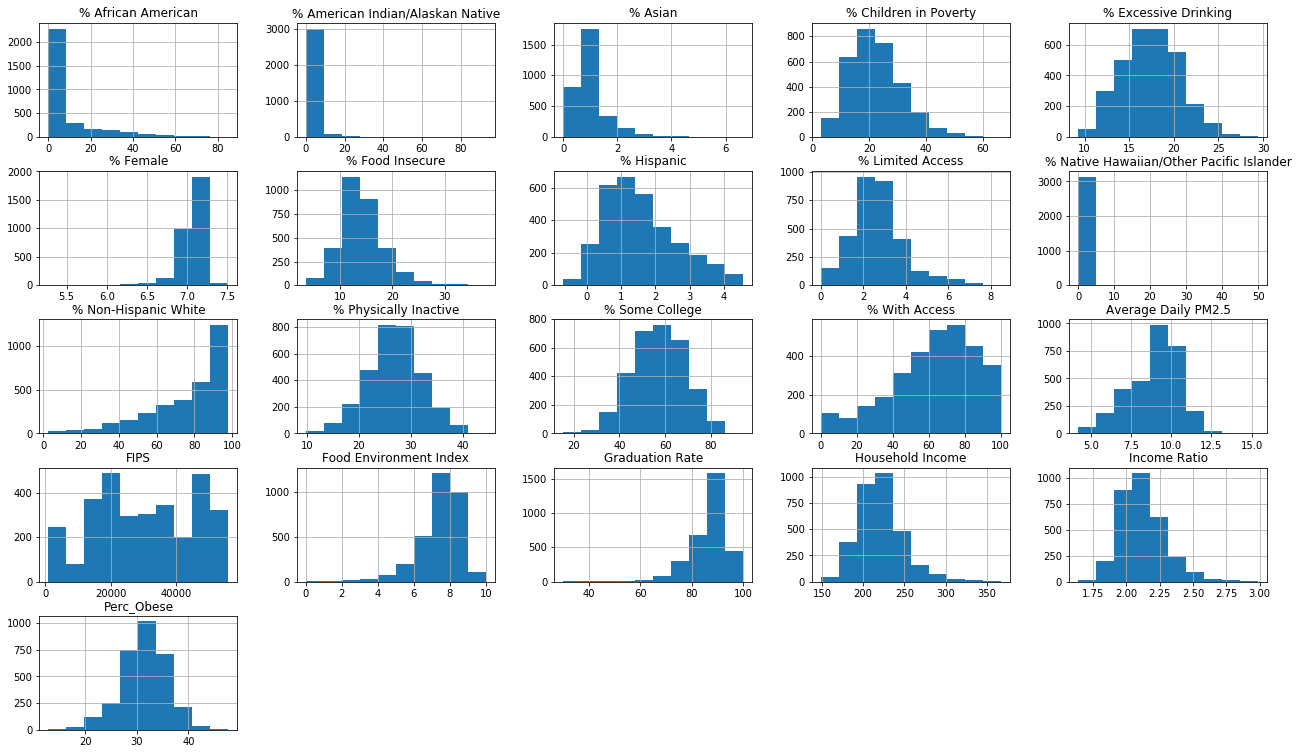

In [24]:
# Check distributions again
plt.rcParams['figure.figsize'] = (22,13)
county_health.hist()
plt.show()

In [25]:
county_health.head()

,FIPS,State,County,Perc_Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Graduation Rate,% Some College,% Children in Poverty,Income Ratio,Average Daily PM2.5,% Food Insecure,% Limited Access,Household Income,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Female
0,1001,Alabama,Autauga,36.4,7.1,30.9,71.120192,16.878015,90.000000,61.942019,19.3,2.094838,10.8,13.9,3.462820,233.424506,19.048650,0.485419,1.067925,0.101054,0.989078,75.000000,7.161595
1,1003,Alabama,Baldwin,29.3,7.9,24.5,68.518915,16.714969,85.000000,63.757100,17.6,2.144932,9.6,13.0,2.329040,237.613131,9.042831,0.770990,1.036810,0.059454,1.485327,83.202198,7.173412
2,1005,Alabama,Barbour,44.2,5.5,30.6,52.842627,12.698715,86.173469,39.723661,39.6,2.421087,10.1,23.4,3.277143,181.339461,47.513961,0.631619,0.671272,0.173310,1.438261,46.450992,6.850723
3,1007,Alabama,Bibb,38.4,7.6,37.5,48.592625,15.925151,85.000000,49.821371,27.5,2.056241,10.5,16.1,1.612956,207.554812,21.618160,0.379808,0.445799,0.119242,0.916158,74.415934,6.809047
4,1009,Alabama,Blount,35.8,8.5,29.0,32.272077,15.378722,91.206250,53.866457,19.4,2.016987,11.3,11.3,1.697100,217.285526,1.434909,0.627340,0.514924,0.112644,2.204828,87.467073,7.114315


In [26]:
county_health.corr()

,FIPS,Perc_Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Graduation Rate,% Some College,% Children in Poverty,Income Ratio,Average Daily PM2.5,% Food Insecure,% Limited Access,Household Income,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Female
FIPS,1.000000,-0.036974,0.084823,-0.038519,-0.031848,0.059913,0.132165,0.006813,-0.101020,-0.071990,-0.153643,-0.140946,0.005449,0.058059,-0.130707,-0.004949,-0.077410,-0.047821,0.040211,0.046963,0.011631
Perc_Obese,-0.036974,1.000000,-0.271404,0.689331,-0.356052,-0.393727,-0.004354,-0.399601,0.404434,0.136218,0.353012,0.381511,0.052631,-0.466117,0.330150,0.097235,-0.387938,-0.086050,-0.370028,-0.029947,0.056936
Food Environment Index,0.084823,-0.271404,1.000000,-0.302859,0.315077,0.431747,0.209697,0.304989,-0.612086,-0.411867,0.126349,-0.761621,-0.738504,0.552457,-0.455859,-0.308724,0.176395,-0.000185,0.033409,0.401975,0.010162
% Physically Inactive,-0.038519,0.689331,-0.302859,1.000000,-0.445955,-0.551641,0.063761,-0.510985,0.500789,0.205701,0.277924,0.412773,0.054435,-0.568929,0.274863,-0.014508,-0.459884,-0.071602,-0.318512,0.005485,0.074574
% With Access,-0.031848,-0.356052,0.315077,-0.445955,1.000000,0.323480,-0.088281,0.414390,-0.348605,-0.091892,0.042485,-0.250342,-0.182676,0.421580,-0.152709,-0.093872,0.461573,0.066182,0.206557,0.019257,0.129400
% Excessive Drinking,0.059913,-0.393727,0.431747,-0.551641,0.323480,1.000000,0.057850,0.511917,-0.622350,-0.313443,-0.039877,-0.534531,-0.109205,0.572723,-0.364215,-0.005952,0.262942,0.012117,0.077388,0.237487,-0.180252
Graduation Rate,0.132165,-0.004354,0.209697,0.063761,-0.088281,0.057850,1.000000,0.026320,-0.205836,-0.179719,0.133075,-0.215823,-0.135975,0.142129,-0.261088,-0.179199,-0.122009,-0.030216,-0.096065,0.300862,-0.019299
% Some College,0.006813,-0.399601,0.304989,-0.510985,0.414390,0.511917,0.026320,1.000000,-0.654461,-0.218878,-0.034327,-0.393181,-0.049427,0.618293,-0.226802,-0.096001,0.384422,0.053683,-0.032860,0.256250,0.241066
% Children in Poverty,-0.101020,0.404434,-0.612086,0.500789,-0.348605,-0.622350,-0.205836,-0.654461,1.000000,0.564660,0.014982,0.730791,0.189617,-0.838631,0.506458,0.165702,-0.307723,-0.030545,-0.053218,-0.443999,0.014713
Income Ratio,-0.071990,0.136218,-0.411867,0.205701,-0.091892,-0.313443,-0.179719,-0.218878,0.564660,1.000000,0.064638,0.563004,0.071683,-0.432600,0.442393,0.120569,0.043769,-0.013055,0.006638,-0.414727,0.120547


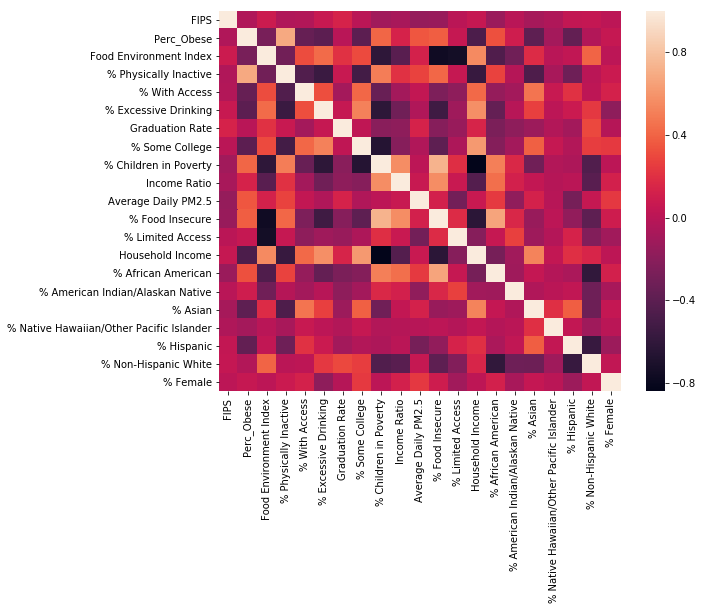

In [27]:
# Heat Map
plt.rcParams['figure.figsize'] = (9,7);
ax = sns.heatmap(county_health.corr());

In [28]:
# Look at the following features with high correlation to Obesity - one model for each:
# Exercise: % Physically Inactive (r = 0.69)
# Income: Household Income (r = -0.47) DISREGARD as highly correlated with % Children in Poverty and scale is larger (r=-0.84)
# Income: % Children in Poverty (r = 0.4)
# Exercise: % With Access (r = -0.36)
# Diet: % Excessive Drinking (r = -0.39)
# Education: % Some College (r = -0.4)
# Environment: Average Daily PM2.5 (r = 0.35)
# Diet: % Food Insecure (0.38)
# Race: % African-American (r = 0.33)
# Race: % Asian (r = -0.39)
# Race: % Hispanic (r = -0.37)

In [29]:
# Obesity model fit with Physically Inactive
obesity_model_PI = sm.OLS(county_health.Perc_Obese,county_health['% Physically Inactive']).fit()
print(obesity_model_PI.summary())

                            OLS Regression Results                            
Dep. Variable:             Perc_Obese   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.627e+05
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:26:50   Log-Likelihood:                -9096.2
No. Observations:                3142   AIC:                         1.819e+04
Df Residuals:                    3141   BIC:                         1.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
% Physically Inactive     1.15

[]

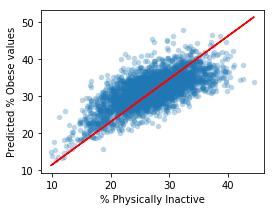

In [30]:
# Obesity model prediction with Physically Inactive
y_prediction_PI = obesity_model_PI.predict(county_health['% Physically Inactive'])
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Physically Inactive'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Physically Inactive'],y_prediction_PI, c='r')
plt.ylabel('Predicted % Obese values')
plt.xlabel('% Physically Inactive')
plt.plot()

In [31]:
X0 = np.asarray(county_health['% Physically Inactive']).reshape(-1,1)
y = np.asarray(county_health.Perc_Obese).reshape(-1,1)
obesity_model_PI2 = LinearRegression().fit(X0,y)

In [32]:
obesity_model_PI2.score(X0,y)

0.47517732314749483

In [33]:
obesity_model_PI2.coef_

array([[0.60117097]])

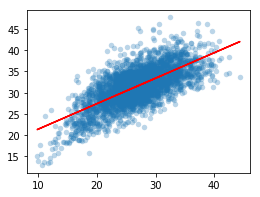

In [89]:
y_prediction_PI2 = obesity_model_PI2.predict(X0)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Physically Inactive'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Physically Inactive'],y_prediction_PI2, c='r')
plt.plot();

In [35]:
# Obesity model fit with Children in Poverty
obesity_model_CP = sm.OLS(county_health.Perc_Obese,county_health['% Children in Poverty']).fit()
print(obesity_model_CP.summary())

                            OLS Regression Results                            
Dep. Variable:             Perc_Obese   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.270e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:26:51   Log-Likelihood:                -12017.
No. Observations:                3142   AIC:                         2.404e+04
Df Residuals:                    3141   BIC:                         2.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
% Children in Poverty     1.23

[]

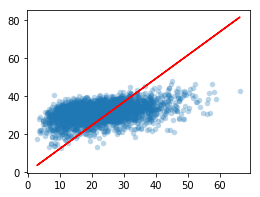

In [36]:
# Obesity model prediction with Children in Poverty - not a good fit
y_prediction_CP = obesity_model_CP.predict(county_health['% Children in Poverty'])
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Children in Poverty'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Children in Poverty'],y_prediction_CP, c='r')
plt.plot()

In [37]:
# try sklearn model instead
X = np.asarray(county_health['% Children in Poverty']).reshape(-1,1)
obesity_model_CP2 = LinearRegression().fit(X,y)

In [38]:
# R-squared
obesity_model_CP2.score(X,y)

0.16356659407790786

In [39]:
obesity_model_CP2.coef_

array([[0.19827507]])

[]

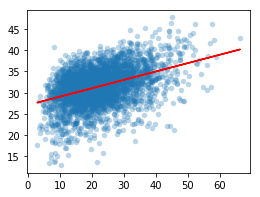

In [40]:
# Line fits much better
y_prediction_CP2 = obesity_model_CP2.predict(X)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Children in Poverty'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Children in Poverty'],y_prediction_CP2, c='r')
plt.plot()

In [41]:
# Obesity model fit with % With Access
obesity_model_WA = sm.OLS(county_health.Perc_Obese,county_health['% With Access']).fit()
print(obesity_model_WA.summary())

                            OLS Regression Results                            
Dep. Variable:             Perc_Obese   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.545e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:26:51   Log-Likelihood:                -12534.
No. Observations:                3142   AIC:                         2.507e+04
Df Residuals:                    3141   BIC:                         2.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
% With Access     0.4318      0.003    124.295

[]

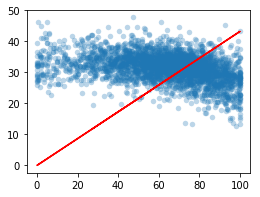

In [42]:
# Obesity model prediction with % With Access - terrible line fit
y_prediction_WA = obesity_model_WA.predict(county_health['% With Access'])
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% With Access'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% With Access'],y_prediction_WA, c='r')
plt.plot()

In [43]:
# try sklearn model instead
X2 = np.asarray(county_health['% With Access']).reshape(-1,1)
obesity_model_WA2 = LinearRegression().fit(X2,y)

In [44]:
obesity_model_WA2.score(X2,y)

0.12677333148762449

In [45]:
obesity_model_WA2.coef_

array([[-0.0693735]])

[]

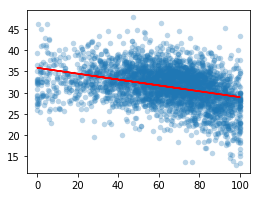

In [46]:
# Line fits much better
y_prediction_WA2 = obesity_model_WA2.predict(X2)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% With Access'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% With Access'],y_prediction_WA2, c='r')
plt.plot()

In [47]:
# use sklearn models for the rest
X3 = np.asarray(county_health['% Excessive Drinking']).reshape(-1,1)
obesity_model_ED = LinearRegression().fit(X3,y)

In [48]:
obesity_model_ED.score(X3,y)

0.15502119969133488

In [49]:
obesity_model_ED.coef_

array([[-0.54806309]])

[]

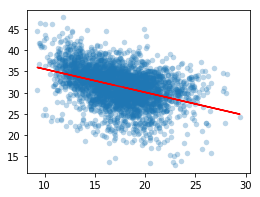

In [50]:
# Line fits much better
y_prediction_ED = obesity_model_ED.predict(X3)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Excessive Drinking'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Excessive Drinking'],y_prediction_ED, c='r')
plt.plot()

In [51]:
# use sklearn models for the rest
X4 = np.asarray(county_health['% Some College']).reshape(-1,1)
obesity_model_SC = LinearRegression().fit(X4,y)

In [52]:
obesity_model_SC.score(X4,y)

0.1596810452284243

In [53]:
obesity_model_SC.coef_

array([[-0.15617346]])

[]

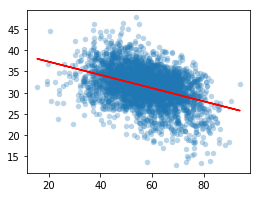

In [54]:
# Line fits much better
y_prediction_SC = obesity_model_SC.predict(X4)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Some College'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Some College'],y_prediction_SC, c='r')
plt.plot()

In [55]:
# use sklearn models for the rest
X5 = np.asarray(county_health['Average Daily PM2.5']).reshape(-1,1)
obesity_model_AD = LinearRegression().fit(X5,y)

In [56]:
obesity_model_AD.score(X5,y)

0.12461733706600953

In [57]:
obesity_model_AD.coef_

array([[1.01182683]])

[]

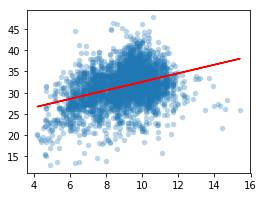

In [58]:
# Line fits much better
y_prediction_AD = obesity_model_AD.predict(X5)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['Average Daily PM2.5'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['Average Daily PM2.5'],y_prediction_AD, c='r')
plt.plot()

In [59]:
# use sklearn models for the rest
X6 = np.asarray(county_health['% Food Insecure']).reshape(-1,1)
obesity_model_FI = LinearRegression().fit(X6,y)

In [60]:
obesity_model_FI.score(X6,y)

0.14555100963937906

In [61]:
obesity_model_FI.coef_

array([[0.40655943]])

[]

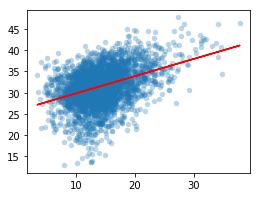

In [62]:
# Line fits much better
y_prediction_FI = obesity_model_FI.predict(X6)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Food Insecure'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Food Insecure'],y_prediction_FI, c='r')
plt.plot()

In [63]:
# use sklearn models for the rest
X7 = np.asarray(county_health['% African American']).reshape(-1,1)
obesity_model_AA = LinearRegression().fit(X7,y)

In [64]:
obesity_model_AA.score(X7,y)

0.10899929952308374

In [65]:
obesity_model_AA.coef_

array([[0.10413854]])

[]

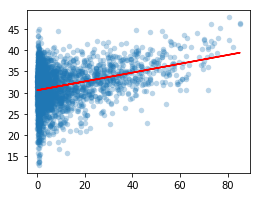

In [66]:
# Line fits much better
y_prediction_AA = obesity_model_AA.predict(X7)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% African American'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% African American'],y_prediction_AA, c='r')
plt.plot()

In [67]:
# use sklearn models for the rest
X8 = np.asarray(county_health['% Asian']).reshape(-1,1)
obesity_model_Asian = LinearRegression().fit(X8,y)

In [68]:
obesity_model_Asian.score(X8,y)

0.15049594649025877

In [69]:
obesity_model_Asian.coef_

array([[-2.67122271]])

[]

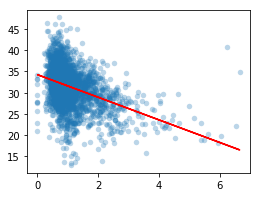

In [70]:
# Line fits much better
y_prediction_Asian = obesity_model_Asian.predict(X8)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Asian'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Asian'],y_prediction_Asian, c='r')
plt.plot()

In [71]:
# use sklearn models for the rest
X9 = np.asarray(county_health['% Hispanic']).reshape(-1,1)
obesity_model_Hisp = LinearRegression().fit(X9,y)

In [72]:
obesity_model_Hisp.score(X9,y)

0.13692095933914328

In [73]:
obesity_model_Hisp.coef_

array([[-1.58469401]])

[]

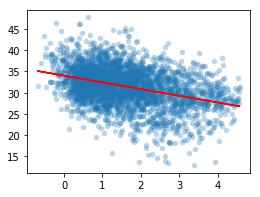

In [74]:
# Line fits much better
y_prediction_Hisp = obesity_model_Hisp.predict(X9)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% Hispanic'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Hispanic'],y_prediction_Hisp, c='r')
plt.plot()

In [75]:
# use sklearn models for the rest
X10 = np.asarray(county_health['% American Indian/Alaskan Native']).reshape(-1,1)
obesity_model_AIAN = LinearRegression().fit(X10,y)

In [76]:
obesity_model_AIAN.score(X10,y)

0.009454679726824455

In [77]:
obesity_model_AIAN.coef_

array([[0.05685186]])

[]

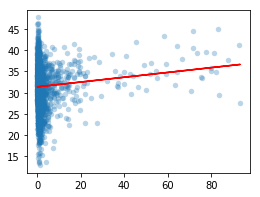

In [78]:
# Line fits much better
y_prediction_AIAN = obesity_model_AIAN.predict(X10)
plt.rcParams['figure.figsize'] = (4,3)
plt.scatter(county_health['% American Indian/Alaskan Native'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% American Indian/Alaskan Native'],y_prediction_AIAN, c='r')
plt.plot()

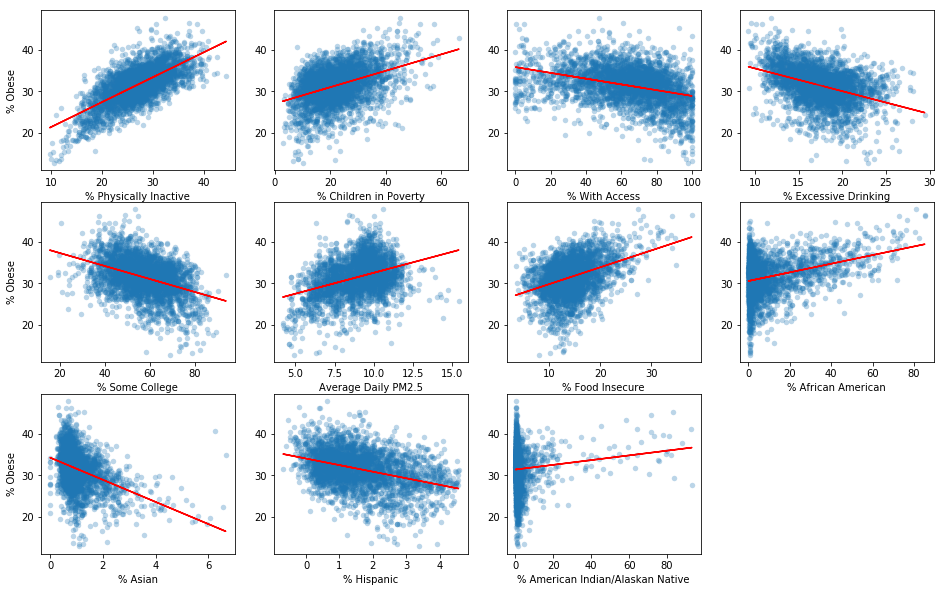

In [79]:
# Scatter plot to see relationship with % Obesity for highest correlations (>= 0.4 or <= -0.4)
# % Physically Inactive (r = 0.69), % Children in Poverty (r = 0.40), Household Income (r = -0.47)
plt.rcParams['figure.figsize'] = (16,10);
plt.subplot(3, 4, 1)
plt.xlabel('% Physically Inactive')
plt.ylabel('% Obese')
plt.scatter(county_health['% Physically Inactive'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Physically Inactive'],y_prediction_PI2, c='r')

plt.subplot(3, 4, 2)
plt.xlabel('% Children in Poverty')
plt.scatter(county_health['% Children in Poverty'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Children in Poverty'],y_prediction_CP2, c='r')

plt.subplot(3, 4, 3)
plt.xlabel('% With Access')
plt.scatter(county_health['% With Access'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% With Access'],y_prediction_WA2, c='r');

plt.subplot(3, 4, 4)
plt.xlabel('% Excessive Drinking')
plt.scatter(county_health['% Excessive Drinking'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Excessive Drinking'],y_prediction_ED, c='r')

plt.subplot(3, 4, 5)
plt.xlabel('% Some College')
plt.ylabel('% Obese')
plt.scatter(county_health['% Some College'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Some College'],y_prediction_SC, c='r')

plt.subplot(3, 4, 6)
plt.xlabel('Average Daily PM2.5')
plt.scatter(county_health['Average Daily PM2.5'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['Average Daily PM2.5'],y_prediction_AD, c='r');

plt.subplot(3, 4, 7)
plt.xlabel('% Food Insecure')
plt.scatter(county_health['% Food Insecure'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Food Insecure'],y_prediction_FI, c='r');

plt.subplot(3, 4, 8)
plt.xlabel('% African American')
plt.scatter(county_health['% African American'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% African American'],y_prediction_AA, c='r')

plt.subplot(3, 4, 9)
plt.xlabel('% Asian')
plt.ylabel('% Obese')
plt.scatter(county_health['% Asian'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Asian'],y_prediction_Asian, c='r')

plt.subplot(3, 4, 10)
plt.xlabel('% Hispanic')
plt.scatter(county_health['% Hispanic'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% Hispanic'],y_prediction_Hisp, c='r');

plt.subplot(3, 4, 11)
plt.xlabel('% American Indian/Alaskan Native')
plt.scatter(county_health['% American Indian/Alaskan Native'], county_health.Perc_Obese,s=30, alpha=0.3, linewidth='0');
plt.plot(county_health['% American Indian/Alaskan Native'],y_prediction_AIAN, c='r');

In [80]:
# multiple regression model
features = county_health[['% Physically Inactive','% Children in Poverty','% With Access','% Excessive Drinking',
                          '% Some College','Average Daily PM2.5','% Food Insecure','% African American','% Asian', '% Hispanic',
                        '% American Indian/Alaskan Native' ]]
obesity_model = sm.OLS(county_health.Perc_Obese,features).fit()
print(obesity_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Perc_Obese   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.901e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:26:53   Log-Likelihood:                -8047.8
No. Observations:                3142   AIC:                         1.612e+04
Df Residuals:                    3131   BIC:                         1.618e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
% Physic

In [81]:
y_prediction = obesity_model.predict(features);

In [82]:
# Calculate error between actual and predicted values
error = abs(y_prediction - county_health.Perc_Obese)/county_health.Perc_Obese*100
avg_error = np.sum(error)/3142
print("Model has an average error of:", avg_error, "%")

Model has an average error of: 8.129233106538704 %


In [83]:
y_prediction_PI2_df = pd.DataFrame(y_prediction_PI2)
y_prediction_CP2_df = pd.DataFrame(y_prediction_CP2)
y_prediction_WA2_df = pd.DataFrame(y_prediction_WA2)
y_prediction_ED_df = pd.DataFrame(y_prediction_ED)
y_prediction_SC_df = pd.DataFrame(y_prediction_SC)
y_prediction_AD_df = pd.DataFrame(y_prediction_AD)
y_prediction_FI_df = pd.DataFrame(y_prediction_FI)
y_prediction_AA_df = pd.DataFrame(y_prediction_AA)
y_prediction_Asian_df = pd.DataFrame(y_prediction_Asian)
y_prediction_Hisp_df = pd.DataFrame(y_prediction_Hisp)
y_prediction_AIAN_df = pd.DataFrame(y_prediction_AIAN)

In [84]:
# Compute residuals
county_health['PI_resids'] = y_prediction_PI2_df[0] - county_health.Perc_Obese
county_health['CP_resids'] = y_prediction_CP2_df[0] - county_health.Perc_Obese
county_health['WA_resids'] = y_prediction_WA2_df[0] - county_health.Perc_Obese
county_health['ED_resids'] = y_prediction_ED_df[0] - county_health.Perc_Obese
county_health['SC_resids'] = y_prediction_SC_df[0] - county_health.Perc_Obese
county_health['AD_resids'] = y_prediction_AD_df[0] - county_health.Perc_Obese
county_health['FI_resids'] = y_prediction_FI_df[0] - county_health.Perc_Obese
county_health['AA_resids'] = y_prediction_AA_df[0] - county_health.Perc_Obese
county_health['Asian_resids'] = y_prediction_Asian_df[0] - county_health.Perc_Obese
county_health['Hisp_resids'] = y_prediction_Hisp_df[0] - county_health.Perc_Obese
county_health['AIAN_resids'] = y_prediction_AIAN_df[0] - county_health.Perc_Obese
county_health['All_resids'] = y_prediction - county_health.Perc_Obese

In [85]:
county_health.head(20)

,FIPS,State,County,Perc_Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,Graduation Rate,% Some College,% Children in Poverty,Income Ratio,Average Daily PM2.5,% Food Insecure,% Limited Access,Household Income,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Female,PI_resids,CP_resids,WA_resids,ED_resids,SC_resids,AD_resids,FI_resids,AA_resids,Asian_resids,Hisp_resids,AIAN_resids,All_resids
0,1001,Alabama,Autauga,36.4,7.1,30.9,71.120192,16.878015,90.000000,61.942019,19.3,2.094838,10.8,13.9,3.462820,233.424506,19.048650,0.485419,1.067925,0.101054,0.989078,75.000000,7.161595,-2.474531,-5.535414,-5.489803,-4.634004,-5.662123,-3.058950,-5.023341,-3.873896,-5.034012,-3.975644,-5.030015,-1.153566
1,1003,Alabama,Baldwin,29.3,7.9,24.5,68.518915,16.714969,85.000000,63.757100,17.6,2.144932,9.6,13.0,2.329040,237.613131,9.042831,0.770990,1.036810,0.059454,1.485327,83.202198,7.173412,0.777975,1.227518,1.790657,2.555356,1.154409,2.826858,1.710755,2.184113,2.149105,2.337953,2.086220,0.880007
2,1005,Alabama,Barbour,44.2,5.5,30.6,52.842627,12.698715,86.173469,39.723661,39.6,2.421087,10.1,23.4,3.277143,181.339461,47.513961,0.631619,0.671272,0.173310,1.438261,46.450992,6.850723,-10.454882,-9.310430,-12.021824,-10.143484,-9.992206,-11.567228,-8.961027,-8.709560,-11.774463,-12.487462,-12.821703,-8.592554
3,1007,Alabama,Bibb,38.4,7.6,37.5,48.592625,15.925151,85.000000,49.821371,27.5,2.056241,10.5,16.1,1.612956,207.554812,21.618160,0.379808,0.445799,0.119242,0.916158,74.415934,6.809047,-0.506802,-5.909558,-5.926987,-6.111774,-5.769200,-5.362498,-6.128911,-5.606311,-5.372174,-5.860088,-7.036019,0.953472
4,1009,Alabama,Blount,35.8,8.5,29.0,32.272077,15.378722,91.206250,53.866457,19.4,2.016987,11.3,11.3,1.697100,217.285526,1.434909,0.627340,0.514924,0.112644,2.204828,87.467073,7.114315,-3.016755,-4.915586,-2.194773,-3.212296,-3.800935,-1.953036,-5.480396,-5.108165,-2.956820,-5.302236,-4.421947,-2.375529
5,1011,Alabama,Bullock,40.2,4.5,29.8,22.191680,12.896317,87.500000,33.716075,45.7,2.458992,9.8,24.4,4.443349,185.143188,69.272341,0.907161,0.510458,0.733449,2.052593,21.530593,6.779113,-6.935819,-4.100952,-5.895461,-6.251782,-5.053980,-7.870776,-4.554467,-2.443674,-7.344892,-9.460990,-8.806038,-4.263449
6,1013,Alabama,Butler,36.0,6.5,33.9,46.040006,13.042811,83.000000,42.221767,36.6,2.247873,9.4,22.0,1.710591,188.172793,44.104410,0.380038,1.036874,0.050005,0.270127,52.215222,7.306527,-0.271018,-1.705255,-3.349903,-2.132070,-2.182344,-4.075507,-1.330210,-0.864625,-4.551066,-2.436327,-4.636006,0.438423
7,1015,Alabama,Calhoun,36.1,6.8,32.5,48.217117,15.431677,92.163374,56.743524,25.7,2.204906,11.6,17.4,3.029615,204.396673,20.734484,0.520020,0.958975,0.098594,1.274613,72.623919,7.203553,-1.212657,-3.966454,-3.600937,-3.541319,-4.550257,-1.949488,-3.300383,-3.398335,-4.442980,-4.128130,-4.728048,0.777495
8,1017,Alabama,Chambers,38.0,6.1,32.6,63.209119,13.528451,85.000000,46.389824,32.5,2.168398,10.4,20.3,3.213807,198.821528,39.349348,0.295482,1.041355,0.062051,0.815559,56.044086,7.211439,-3.052540,-4.518183,-6.540984,-4.398231,-4.833283,-5.063680,-4.021361,-3.359810,-6.563035,-5.300668,-6.640813,-1.738600
9,1019,Alabama,Cherokee,35.5,8.2,35.9,36.030628,15.232731,88.000000,55.565627,27.5,2.154233,10.8,13.9,0.470226,203.607465,4.291545,0.629738,0.506517,0.031098,0.473399,91.692906,7.096722,1.431324,-3.009558,-2.155517,-2.832284,-3.766300,-2.158950,-4.123341,-4.510679,-2.634365,-2.258451,-4.121810,2.444861


In [86]:
# Save Health Data to a csv file to import into Tableau for visual analysis later
county_health.to_csv('VA County Health.csv', index=False)

In [87]:
county_health.All_resids.describe()

count    3142.000000
mean       -0.060339
std         3.134292
min       -15.105677
25%        -2.163960
50%         0.119185
75%         2.042277
max        13.855649
Name: All_resids, dtype: float64

In [88]:
high_outlier2 = county_health.All_resids.mean() + 3*(county_health.All_resids.std())
low_outlier2 = county_health.All_resids.mean() - 3*(county_health.All_resids.std())
print(high_outlier2)
print(low_outlier2)

9.342537085971674
-9.463215571342221
